<a href="https://colab.research.google.com/github/komorimasashi/kakuritsu_toukei_1/blob/main/4_scatterplot_correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#2つの量的変数の関係の見方

##散布図

###Irisデータセットで相関を見る

sepal length (がくの長さ)、sepal width (がくの幅)、petal length (花弁の長さ)、petal width (花弁の幅) の関係を見てみましょう


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

#scikit-learnライブラリからデータセットだけを用いる
from sklearn import datasets

#Irisデータを読み込みます
iris = datasets.load_iris()

#Iris.dataには花の特徴量がある．iris.targetに'target'と名前をつけて一つのDataFrameに統合
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target_names[iris.target]

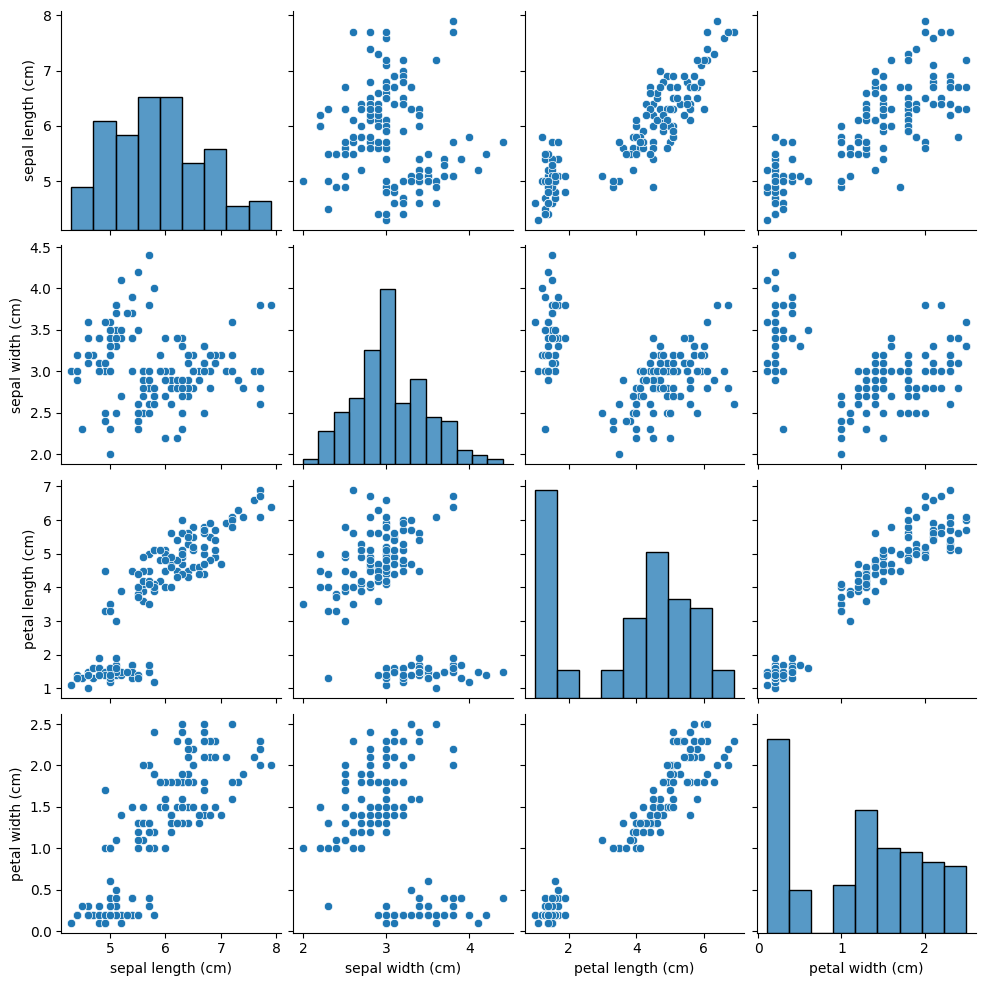

In [2]:
#ペアプロット（種の区別なし）
sns.pairplot(df)

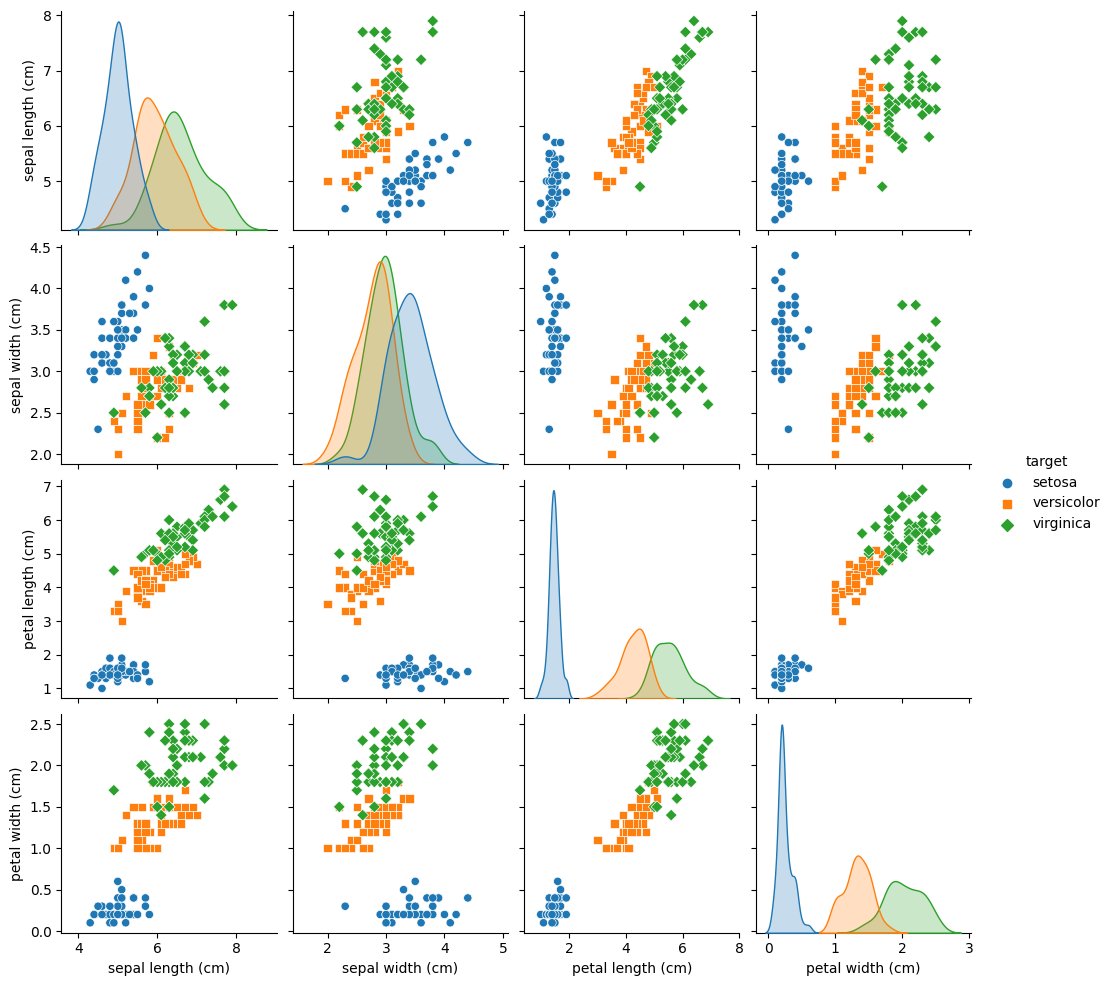

In [12]:
#ペアプロット（種の区別あり）
sns.pairplot(df, hue='target', markers=["o", "s", "D"])

In [13]:
#相関係数の算出
df.drop('target', axis=1).corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


###GDPと特殊出生率

小森のGoogle Drive上のデータを読み込むためにurllibライブラリを使います．

ネタ元はこちらです
https://honkawa2.sakura.ne.jp/1563.html

In [14]:
import pandas as pd
import urllib
import io

url = "https://drive.google.com/uc?id=1W98VH-en4XoYI1zx7i8ruYh3Y2kWA_Ee"
res = urllib.request.urlopen(url)
res=res.read().decode('shift-jis')
df =pd.read_csv(io.StringIO(res))

#Indexをname列にする
df.set_index(['国名'],inplace=True)
df.head()

,順位,１人当たりGDP（米ドル・ＰＰＰベース）,合計特殊出生率,OECD高所得国
国名,,,,
カタール,1,134290,2.04,False
マカオ,2,127743,1.06,False
ルクセンブルク,3,89577,1.57,True
クウェート,4,83840,2.63,False
シンガポール,5,75952,1.29,False


まずは１人当たりGDP（米ドル・ＰＰＰベースと合計特殊出生率を散布図にプロットしてみましょう．

基本的に散布図ではX軸は「原因」Y軸は「結果」と対応するように書くのが普通です．

GDPが出生率に影響していると考えるなら，GDPを横軸，出生率を縦軸にします


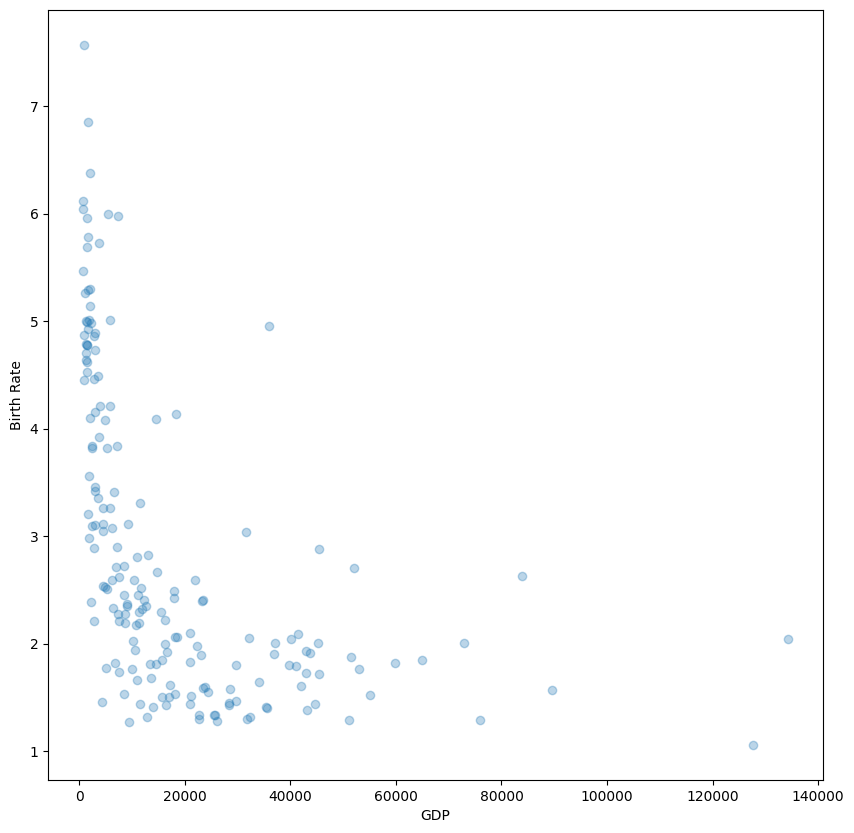

In [15]:
#散布図を書きます

import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.scatter(df['１人当たりGDP（米ドル・ＰＰＰベース）'],df['合計特殊出生率'], alpha=0.3)
plt.xlabel('GDP')
plt.ylabel('Birth Rate')
plt.show()

次にX軸だけ対数軸にしてみてみましょう．こうするとかなりきれいな直線的な関係が見えてきます．

つまり，GDPがわかれば出生率をかなり正確に予測できるということです．

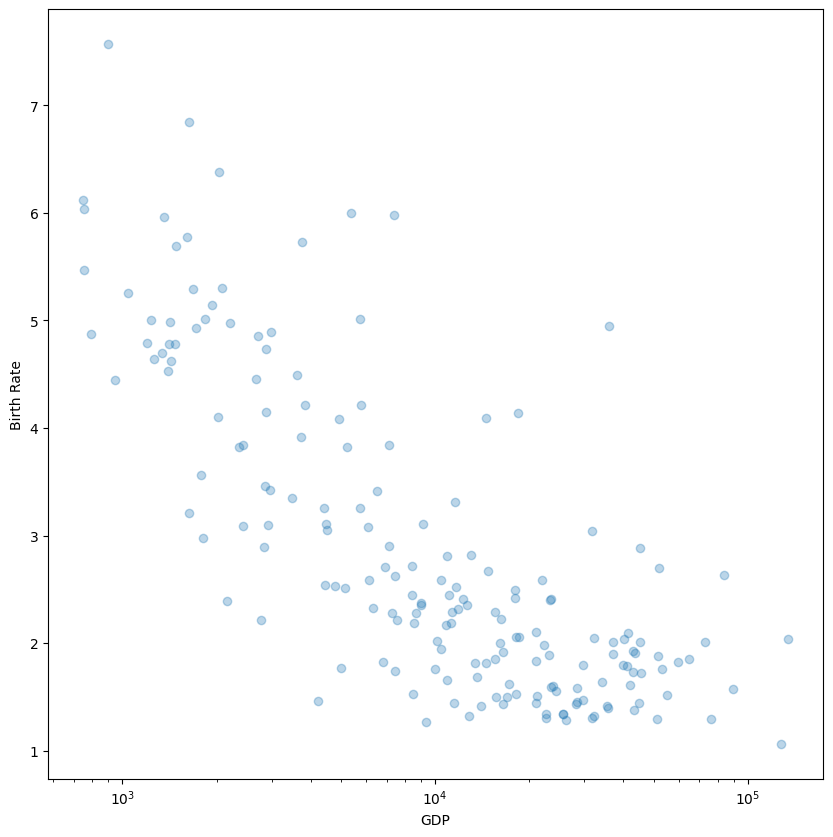

In [16]:
#上の図のX軸を対数軸にして表示してみます
plt.figure(figsize=(10,10))
plt.scatter(df['１人当たりGDP（米ドル・ＰＰＰベース）'],df['合計特殊出生率'], alpha=0.3)
plt.xscale('log')
plt.xlabel('GDP')
plt.ylabel('Birth Rate')
plt.show()

次に先進国（OECD加盟国）のみを抜き出して分析してみましょう

In [17]:
df_dict = {}
for name, group in df.groupby('OECD高所得国'):
    df_dict[name] = group

df_dict[1].head() #df_dict[1]は先進国のデータだけのDataFrameです．

,順位,１人当たりGDP（米ドル・ＰＰＰベース）,合計特殊出生率,OECD高所得国
国名,,,,
ルクセンブルク,3,89577,1.57,True
ノルウェー,7,64839,1.85,True
スイス,9,55029,1.52,True
米国,12,51496,1.88,True
オランダ,14,45414,1.72,True


先進国だけを見るとGDPと出生率の関係は明確でないことがわかります

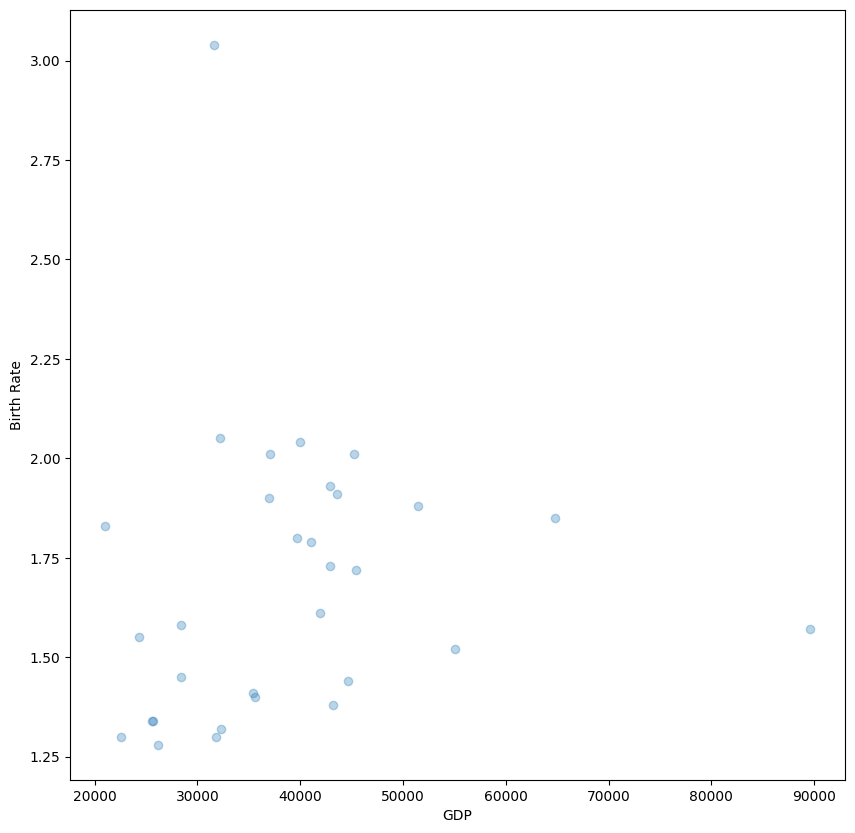

In [18]:
plt.figure(figsize=(10,10))
plt.scatter(df_dict[1]['１人当たりGDP（米ドル・ＰＰＰベース）'],df_dict[1]['合計特殊出生率'], alpha=0.3)
plt.xlabel('GDP')
plt.ylabel('Birth Rate')
plt.show()

さらにここからイスラエルとルクセンブルクを抜きます

In [19]:
# inplace=Trueとすると，dropメソッドで列/行を削除したデータフレームに置き換えられます
df_dict[1].drop(['ルクセンブルク','イスラエル'], inplace=True)
df_dict[1].head()

,順位,１人当たりGDP（米ドル・ＰＰＰベース）,合計特殊出生率,OECD高所得国
国名,,,,
ノルウェー,7,64839,1.85,True
スイス,9,55029,1.52,True
米国,12,51496,1.88,True
オランダ,14,45414,1.72,True
アイルランド,16,45282,2.01,True


外れ値を省くと，先進国ではGDPと出生率には明確な関係が認められないことがわかります．

もちろん，この「外れ値を省く」操作には十分な妥当性が必要です．

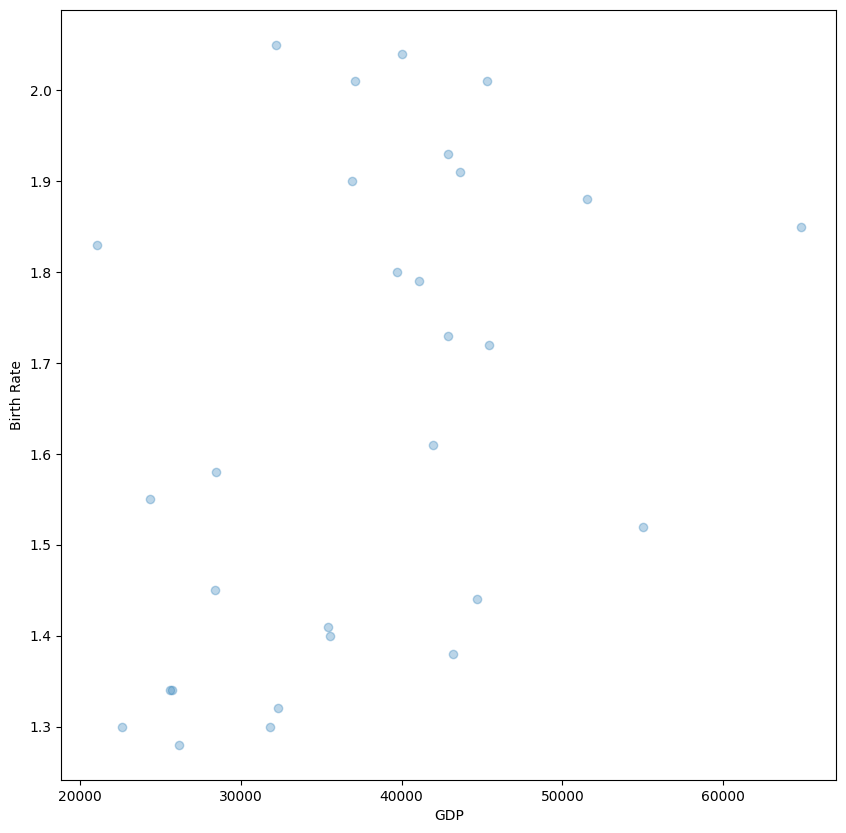

In [20]:
plt.figure(figsize=(10,10))
plt.scatter(df_dict[1]['１人当たりGDP（米ドル・ＰＰＰベース）'],df_dict[1]['合計特殊出生率'], alpha=0.3)
plt.xlabel('GDP')
plt.ylabel('Birth Rate')
plt.show()

###政府統計の活用（Webデータ）


政府統計
社会・人口統計体系 / 統計でみる都道府県のすがた2019 / 社会生活統計指標

https://www.e-stat.go.jp/stat-search/files?page=1&stat_infid=000031788971

からExcelファイルをダウンロードします

https://www.e-stat.go.jp/stat-search/file-download?statInfId=000031788971&fileKind=0

ただ，一部いわゆる「神エクセル」なので，データの整理には大変苦労します．

In [21]:
import pandas as pd
import urllib

url = "https://www.e-stat.go.jp/stat-search/file-download?statInfId=000031788971&fileKind=0"

#xlsを読み込む関数
def read_xls(url):
    print(url)
    df = pd.read_excel(url)
    return df

#実行
df = read_xls(url)
df.head(10)

https://www.e-stat.go.jp/stat-search/file-download?statInfId=000031788971&fileKind=0


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,72,73,74,75,76,77,78,79,80,Unnamed: 91
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,72,73,74,75,76,77,78,79,80,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,No.37,NaN,No.38,NaN,No.39,NaN,No.40,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,高齢単身世帯の割合\n（対一般世帯数）,NaN,共働き世帯割合\n（対一般世帯数）,NaN,婚姻率\n（人口千人当たり）,NaN,離婚率\n（人口千人当たり）,NaN,都道府県コード
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Ratio of aged-single person households,NaN,Ratio of dual-income households,NaN,"Rate of marriages (per 1,000 persons)",NaN,"Rate of divorces (per 1,000 persons)",NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,#A06304,NaN,#F01503,NaN,#A06601,NaN,#A06602,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,単位,Unit,...,NaN,％,NaN,％,NaN,－,NaN,－,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,年度,Fiscal year,...,NaN,2015,NaN,2015,NaN,2017,NaN,2017,NaN,NaN


In [22]:
#泥臭く列名のリネームや不要な行列の削除を行う
df = df.drop(df.columns[0:9], axis=1)
df = df.rename(columns=df.loc[5,:])
df = df.drop(df.index[range(0,12)])
df.head()

,NaN,NaN,総人口,NaN,総人口〔男〕,NaN,総人口〔女〕,NaN,外国人人口\n（人口10万人当たり）,NaN,...,NaN,高齢単身世帯の割合\n（対一般世帯数）,NaN,共働き世帯割合\n（対一般世帯数）,NaN,婚姻率\n（人口千人当たり）,NaN,離婚率\n（人口千人当たり）,NaN,都道府県コード
12,Hokkaido,NaN,532,8,251,8,281,8,402.8,42,...,9,13.1,9,21.14,45,4.5,17,1.91,4,01
13,Aomori-ken,NaN,128,31,60,32,68,31,263.5,47,...,37,12.09,15,27.58,23,4.01,42,1.64,22,02
14,Iwate-ken,NaN,126,32,60,31,65,32,392.1,43,...,38,10.91,26,29.84,14,3.8,46,1.48,40,03
15,Miyagi-ken,NaN,232,14,114,14,119,14,599.4,30,...,45,9.06,45,24.61,35,4.58,13,1.61,28,04
16,Akita-ken,NaN,100,38,47,39,53,38,284.8,46,...,19,12.34,13,30.18,12,3.32,47,1.37,43,05


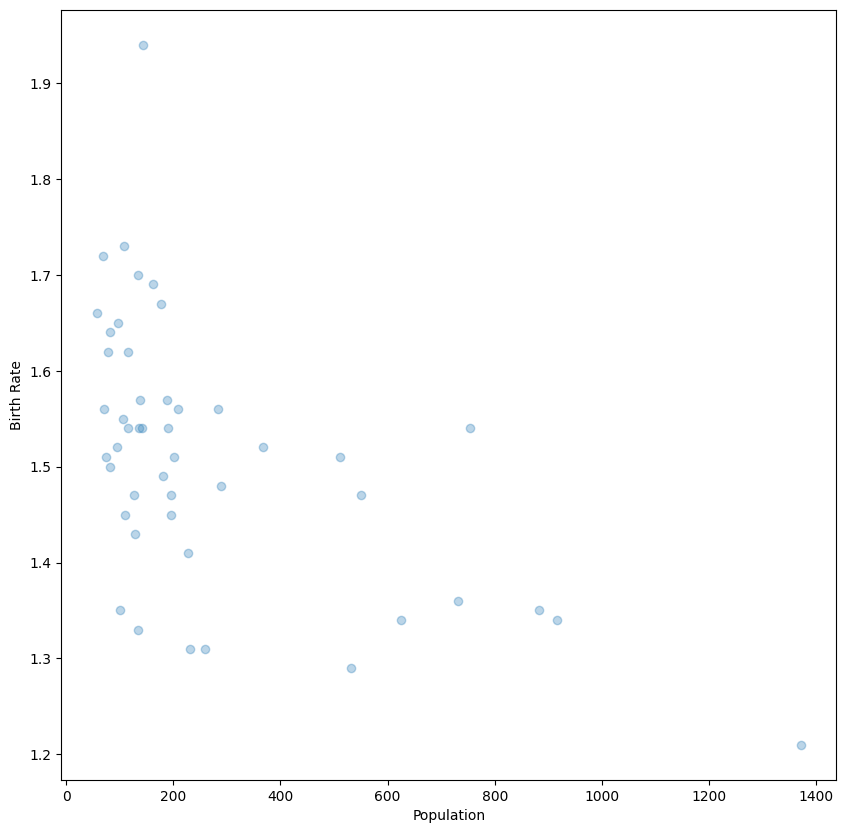

In [23]:
plt.figure(figsize=(10,10))
plt.scatter(df['総人口'],df['合計特殊出生率'], alpha=0.3)
plt.xlabel('Population')
plt.ylabel('Birth Rate')
plt.show()

##相関係数

###相関係数の定義

相関係数(correlation coefficient)}は
$\begin{equation}
r = \frac{ S_{\mathrm{xy}} }{ S_{\mathrm{x}} S_{\mathrm{y}} }
\end{equation}
$で定義されます．


ここで、$x$の分散(variance) $S_{\mathrm{x}}^{2}$と$y$の分散$S_{\mathrm{y}}^{2}$は
\begin{eqnarray}
S_{\mathrm{x}}^{2} &=& \frac{1}{n} \sum_{i=1}^{n} \left( x_{i} - \overline{x} \right)^{2} = \frac{1}{n} \sum_{i=1}^{n} x_{i}^{2} - \overline{x} ^{2} , \\
S_{\mathrm{y}}^{2} &=& \frac{1}{n} \sum_{i=1}^{n} \left( y_{i} - \overline{y} \right)^{2} = \frac{1}{n} \sum_{i=1}^{n} y_{i}^{2} - \overline{y} ^{2}
\end{eqnarray}

と表され、$x$の平均(average) $\overline{x}$と$y$の平均 $\overline{y}$は
\begin{eqnarray}
\overline{x} &=& \frac{1}{n} \sum_{i=1}^{n} x_{i} \\
\overline{y} &=& \frac{1}{n} \sum_{i=1}^{n} y_{i}
\end{eqnarray}
です．

また，共分散(covariance) $S_{\mathrm{xy}}$は
\begin{equation}
S_{\mathrm{xy}} = \frac{1}{n} \sum_{i=1}^{n} \left( x_{i} - \overline{x} \right) \left( y_{i} - \overline{y} \right) = \frac{1}{n} \sum_{i=1}^{n} x_{i} y_{i} - \overline{x} \overline{y}
\end{equation}
です．


$\begin{equation}
r = \frac{ S_{\mathrm{xy}} }{ S_{\mathrm{x}} S_{\mathrm{y}} }
\end{equation}
$の分母は$x$の$S_{\mathrm{x}}^{2}$と$y$の分散$S_{\mathrm{y}}^{2}$それぞれの平方根であることに注意してください．

|$r$の範囲&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|相関の度合い|
|---|---|
|$-1 ≤ r < -0.7$|強い負の相関|
|$-0.7 ≤ r < -0.4$|負の相関|
|$-0.4 ≤ r < -0.2$|弱い負の相関|
|$-0.2 ≤ r < 0.2$|相関がほとんどない|
|$0.2 ≤ r < 0.4$|弱い正の相関|
|$0.4 ≤ r < 0.7$|正の相関|
|$0.7 ≤ r ≤ 1$|強い正の相関|

###乱数で生成した変数同士の相関

正規分布$\mathcal{N} (\mu,\sigma^2)$に従う正規乱数を生成する関数として

```
numpy.random.normal(loc, scale, size)
```
が用意されています．これを使って多変量正規分布に従う乱数を発生させます


*   loc: 生成したい正規分布の平均を指定(default=0)

*   scale: 生成したい正規分布の標準偏差を指定(default=1)

*   size: 生成する乱数の数を指定(default=None)





平均が
$
\boldsymbol{\mu}  =
\begin{pmatrix}
0 \\
0\end{pmatrix}
$
分散共分散行列
$
\boldsymbol{\Sigma}  =
\begin{pmatrix}
1 & 1 \\
1 & 1
\end{pmatrix}
$
とした時の正規乱数の生成をするために下を実行します

これは相関係数$r=1$の状態です

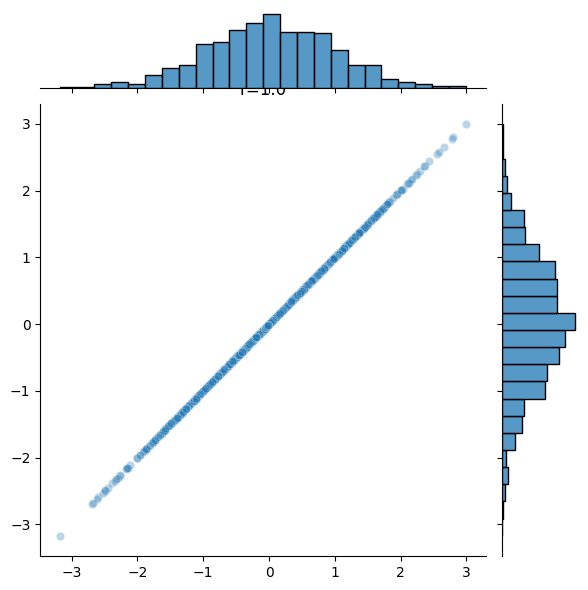

In [25]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

mu = [0, 0]
sigma = [[1, 1], [1, 1]]

#　乱数発生のシード値の固定(乱数のシードの値を1に変えて実行してみよう)
np.random.seed(0)

# 2次元正規乱数を1000生成
values = np.random.multivariate_normal(mu, sigma, 1000)

# 散布図
sns.jointplot(x=values[:,0], y=values[:,1], alpha=0.3)
plt.title("r=1.0")
plt.show()

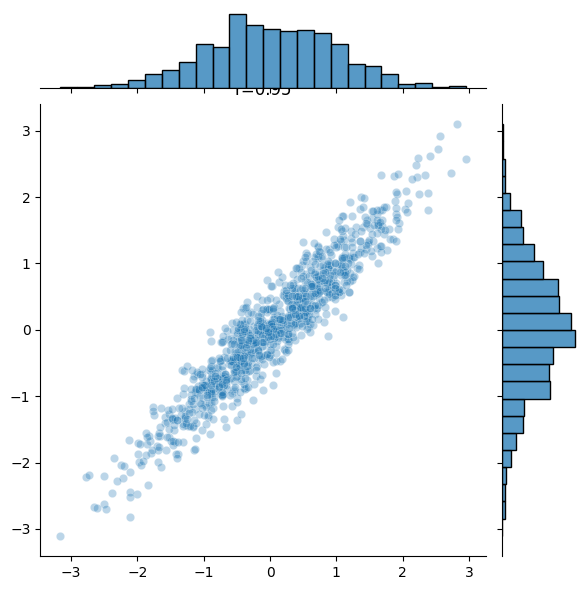

In [26]:
mu = [0, 0]
sigma = [[1, 0.95], [0.95, 1]]

#　乱数発生のシード値の固定(乱数のシードの値を1に変えて実行してみよう)
np.random.seed(0)

# 2次元正規乱数を1000生成
values = np.random.multivariate_normal(mu, sigma, 1000)

# 散布図
sns.jointplot(x=values[:,0], y=values[:,1], alpha=0.3)
plt.title("r=0.95")
plt.show()

次に，分散共分散行列
$
\boldsymbol{\Sigma}  =
\begin{pmatrix}
1 & 0.8 \\
0.8 & 1
\end{pmatrix}
$
とした時の正規乱数の生成します
これは相関係数$r=0.8$の状態です

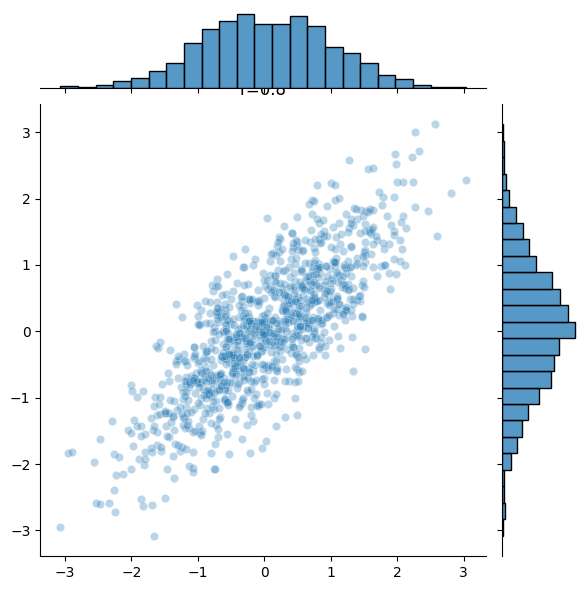

In [27]:
mu = [0, 0]
sigma = [[1, 0.8], [0.8, 1]]

#　乱数発生のシード値の固定(乱数のシードの値を1に変えて実行してみよう)
np.random.seed(0)

# 2次元正規乱数を1000生成
values = np.random.multivariate_normal(mu, sigma, 1000)

# 散布図
sns.jointplot(x=values[:,0], y=values[:,1], alpha=0.3)
plt.title("r=0.8")
plt.show()

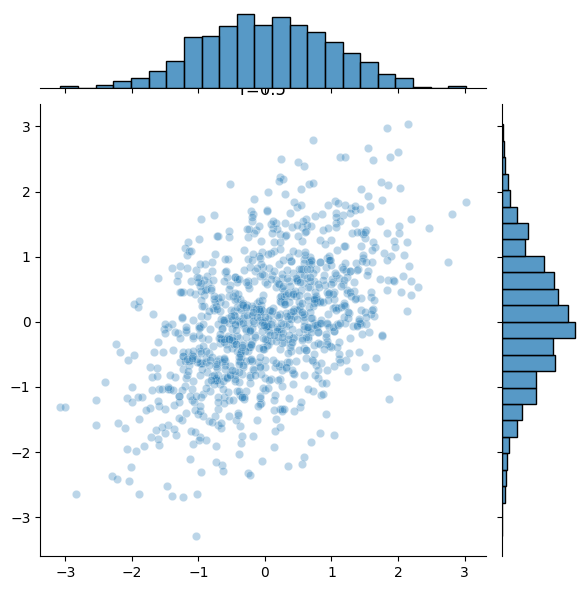

In [28]:
mu = [0, 0]
sigma = [[1, 0.5], [0.5, 1]]

#　乱数発生のシード値の固定(乱数のシードの値を1に変えて実行してみよう)
np.random.seed(0)

# 2次元正規乱数を1000生成
values = np.random.multivariate_normal(mu, sigma, 1000)

# 散布図
sns.jointplot(x=values[:,0], y=values[:,1], alpha=0.3)
plt.title("r=0.5")
plt.show()

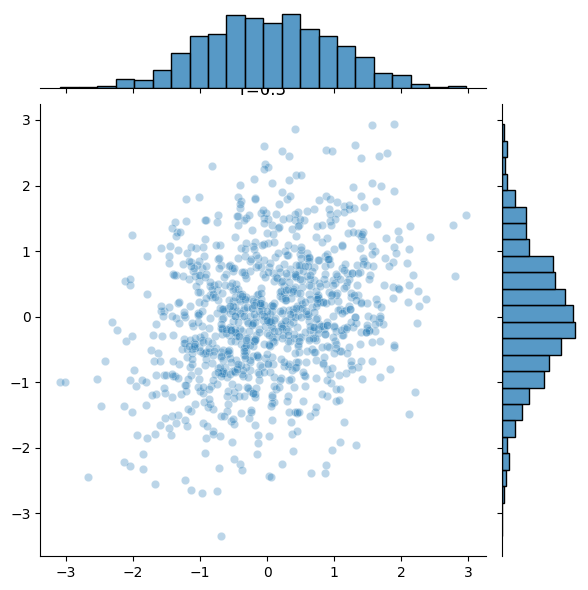

In [29]:
mu = [0, 0]
sigma = [[1, 0.3], [0.3, 1]]

#　乱数発生のシード値の固定(乱数のシードの値を1に変えて実行してみよう)
np.random.seed(0)

# 2次元正規乱数を1000生成
values = np.random.multivariate_normal(mu, sigma, 1000)

# 散布図
sns.jointplot(x=values[:,0], y=values[:,1], alpha=0.3)
plt.title("r=0.3")
plt.show()

次に，分散共分散行列
$
\boldsymbol{\Sigma}  =
\begin{pmatrix}
1 & 0 \\
0 & 1
\end{pmatrix}
$
とした時の正規乱数の生成します

これは「無相関」（$r=0$つまり独立）の状態です


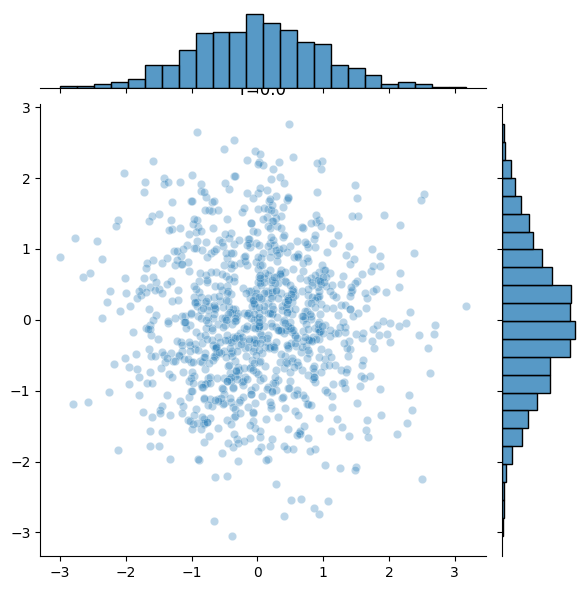

In [30]:
mu = [0, 0]
sigma = [[1, 0], [0, 1]]

#　乱数発生のシード値の固定(乱数のシードの値を1に変えて実行してみよう)
np.random.seed(0)

# 2次元正規乱数を1000生成
values = np.random.multivariate_normal(mu, sigma, 1000)

# 散布図
sns.jointplot(x=values[:,0], y=values[:,1], alpha=0.3)
plt.title("r=0.0")
plt.show()

次に，分散共分散行列
$
\boldsymbol{\Sigma}  =
\begin{pmatrix}
1 & -0.8 \\
-0.8 & 1
\end{pmatrix}
$
とした時の正規乱数の生成します


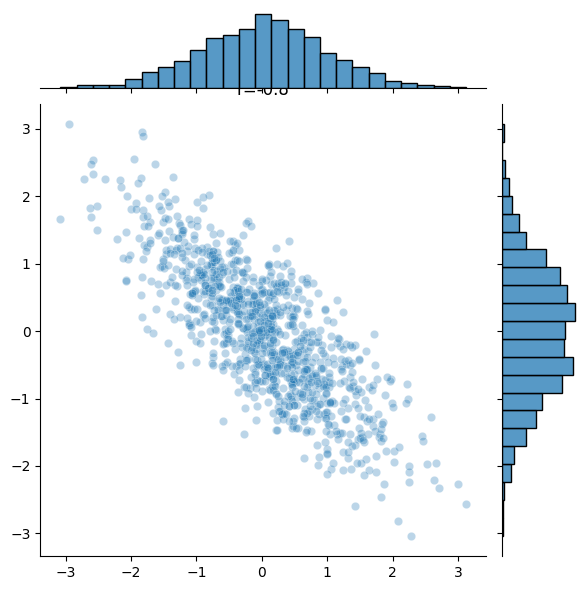

In [31]:
mu = [0, 0]
sigma = [[1, -0.8], [-0.8, 1]]

#　乱数発生のシード値の固定(乱数のシードの値を1に変えて実行してみよう)
np.random.seed(0)

# 2次元正規乱数を1000生成
values = np.random.multivariate_normal(mu, sigma, 1000)

# 散布図
sns.jointplot(x=values[:,0], y=values[:,1], alpha=0.3)
plt.title("r=-0.8")
plt.show()


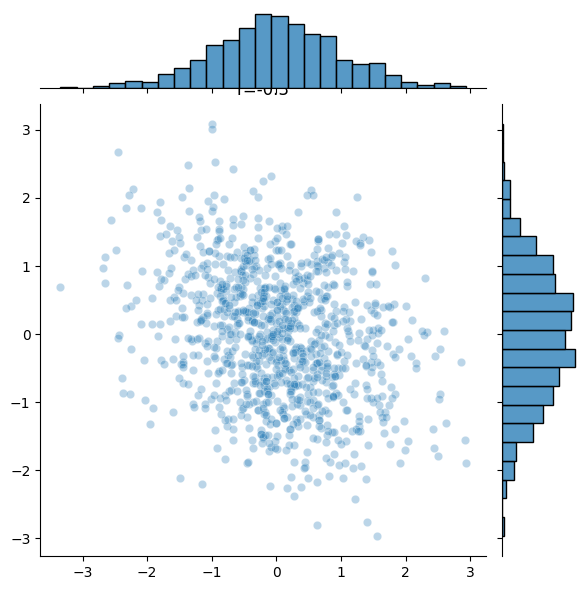

In [32]:
mu = [0, 0]
sigma = [[1, -0.3], [-0.3, 1]]

#　乱数発生のシード値の固定(乱数のシードの値を1に変えて実行してみよう)
np.random.seed(0)

# 2次元正規乱数を1000生成
values = np.random.multivariate_normal(mu, sigma, 1000)

# 散布図
sns.jointplot(x=values[:,0], y=values[:,1], alpha=0.3)
plt.title("r=-0.3")
plt.show()


In [33]:
#相関係数numpy
#ほぼ-0.8になっていることがわかる
np.corrcoef(values[:,0], values[:,1])

array([[ 1.        , -0.29317178],
       [-0.29317178,  1.        ]])

In [34]:
#相関係数pandas
pd.DataFrame(values).corr()

,0,1
0,1.000000,-0.293172
1,-0.293172,1.000000


##資料用の作図

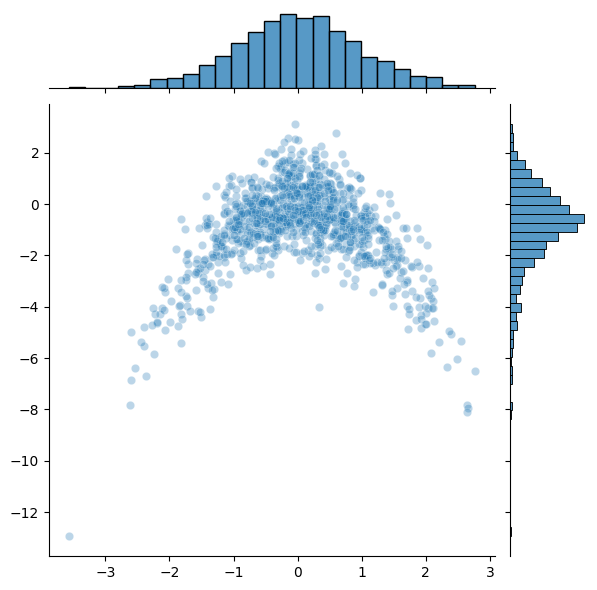

In [36]:
#　乱数発生のシード値の固定(乱数のシードの値を1に変えて実行してみよう)
np.random.seed(1234)
x = np.random.normal(0,1,1000)
y = -x**2 + np.random.normal(0,1,1000)

sns.jointplot(x=x, y=y, alpha=0.3)
plt.show()

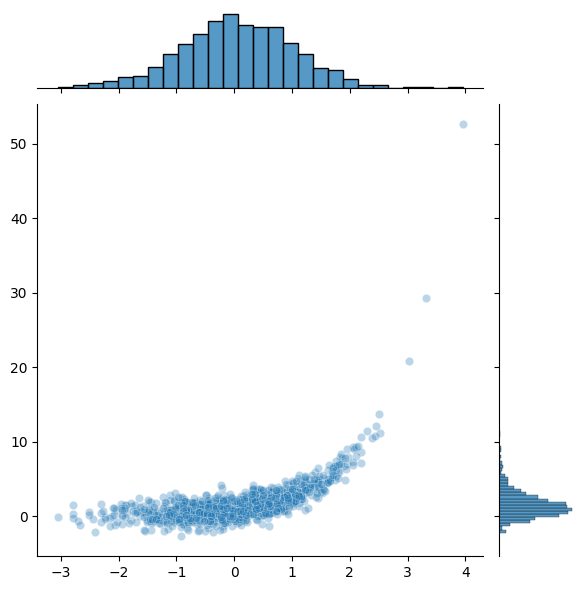

In [37]:
#　乱数発生のシード値の固定(乱数のシードの値を1に変えて実行してみよう)
np.random.seed(1)
x = np.random.normal(0,1,1000)
y =np.exp(x) + np.random.normal(0,1,1000)

sns.jointplot(x=x, y=y, alpha=0.3)
plt.show()